In [69]:
## basic import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

## modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import  CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [70]:
## read the csv file 
df = pd.read_csv('data/stud.csv')

In [71]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Prepairing x and y variable 

In [72]:
X= df.drop('math score',axis=1)  ## drop math score and stored in y 

In [73]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [74]:
y=df['math score']

In [75]:
print("categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())


categories in 'gender' variable:     ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test preparation course' variable:     ['none' 'completed']


in this if less features we do one hot encoding and for more features we do target guided ordinal encoding.

In [76]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [77]:
## create column transformer with 3 type of transformers 
## pipiline ( one after the other)
num_features=X.select_dtypes(exclude="object").columns
cat_features= X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler ##column transformer will combine these two together
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()  ##intialize both 
oh_transformer= OneHotEncoder()

## this preprocessor will used later to do fit and transform on datasets
preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)



In [78]:
X= preprocessor.fit_transform(X)

In [79]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [80]:
X.shape

(1000, 19)

In [81]:
## separate  datasets into train and test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
X_train.shape , X_test.shape


((800, 19), (200, 19))

create evaluation function to give all metrics after model training 

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
 "Linear Regression": LinearRegression(),
 "Lasso":Lasso(),
 "Ridge":Ridge(),
 "K-NeighborsRegressor":KNeighborsRegressor(),
 "DecisionTreeRegressor":DecisionTreeRegressor(),
 "RandomForestRegressor":RandomForestRegressor(),
 "XGBRegressor":XGBRegressor(),
 "CatBoostRegressor":CatBoostRegressor(verbose=False),
 "AdaBoostRegressor":AdaBoostRegressor()
}
model_list= []
r2_list= []


for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)   ## train model 

## make predictions

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

## evaluate train and test dataset 
model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

print(list(models.keys())[i])
model_list.append(list(models.keys())[i])  ## append all values here

print('model performance for training set')
print(" - Root mean square error:{:.4f}".format(model_train_rmse))
print(" - Mean absolute error:{:.4f}".format(model_train_mae))
print(" - R2 score:{:.4f}".format(model_train_r2))

print('------------------------------')

print('model performance for test set')
print(" - Root mean square error:{:.4f}".format(model_test_rmse))
print(" - Mean absolute error:{:.4f}".format(model_test_mae))
print(" - R2 score:{:.4f}".format(model_test_r2))
r2_list.append(model_test_r2)

print('='*35)
print('\n')

AdaBoostRegressor
model performance for training set
 - Root mean square error:5.8344
 - Mean absolute error:4.8137
 - R2 score:0.8490
------------------------------
model performance for test set
 - Root mean square error:6.0354
 - Mean absolute error:4.6801
 - R2 score:0.8503




Results

In [90]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
0,AdaBoostRegressor,0.850307


Adabooost :

In [92]:
ada_model=AdaBoostRegressor()
ada_model=ada_model.fit(X_train,y_train)
y_pred=ada_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of model is %.2f" %score)

accuracy of model is 84.91


plot y_pred and y_test

Text(0, 0.5, 'predicted')

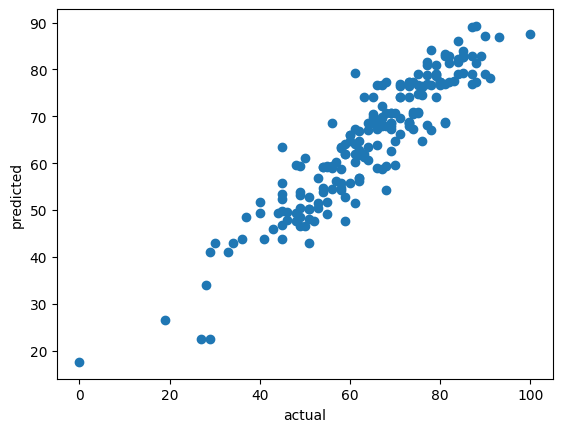

In [93]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")

plt.ylabel("predicted")

<Axes: xlabel='math score'>

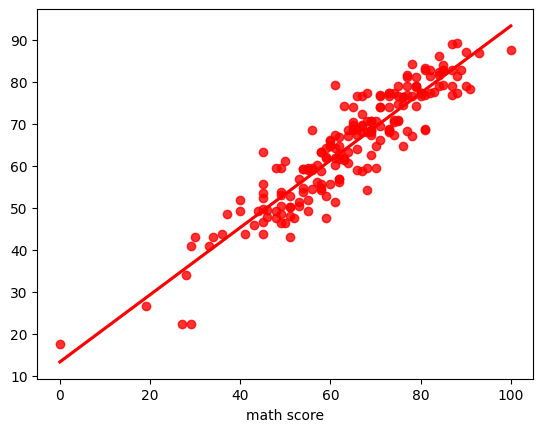

In [94]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

difference between actual and predicted value 

In [95]:
pred_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})
pred_df

,actual value,predicted value,difference
521,91,78.244898,12.755102
737,53,56.944444,-3.944444
740,80,77.243094,2.756906
660,74,77.343750,-3.343750
411,84,82.283333,1.716667
...,...,...,...
408,52,47.627358,4.372642
332,62,56.119048,5.880952
208,74,67.378378,6.621622
613,65,68.472222,-3.472222
